In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Credit card transactions - India - Simple.csv'
df = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


(None,
    index                   City       Date  Card Type Exp Type Gender  Amount
 0      0           Delhi, India  29-Oct-14       Gold    Bills      F   82475
 1      1  Greater Mumbai, India  22-Aug-14   Platinum    Bills      F   32555
 2      2       Bengaluru, India  27-Aug-14     Silver    Bills      F  101738
 3      3  Greater Mumbai, India  12-Apr-14  Signature    Bills      F  123424
 4      4       Bengaluru, India   5-May-15       Gold    Bills      F  171574)

In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce')

# Extract Year and Month from the Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Check for any invalid dates (NaT values)
invalid_dates = df['Date'].isna().sum()

# Display the first few rows after preprocessing and count of invalid dates
df_head = df.head()
invalid_dates, df_head


(0,
    index                   City       Date  Card Type Exp Type Gender  Amount  \
 0      0           Delhi, India 2014-10-29       Gold    Bills      F   82475   
 1      1  Greater Mumbai, India 2014-08-22   Platinum    Bills      F   32555   
 2      2       Bengaluru, India 2014-08-27     Silver    Bills      F  101738   
 3      3  Greater Mumbai, India 2014-04-12  Signature    Bills      F  123424   
 4      4       Bengaluru, India 2015-05-05       Gold    Bills      F  171574   
 
    Year  Month  
 0  2014     10  
 1  2014      8  
 2  2014      8  
 3  2014      4  
 4  2015      5  )

In [ ]:
# Aggregate data to calculate monthly expenditure per city
city_monthly_expenditure = (
    df.groupby(['City', 'Year', 'Month'])
    .agg({'Amount': 'sum'})
    .reset_index()
    .sort_values(by=['City', 'Year', 'Month'])
)




In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sample DataFrame for demonstration
data = {
    'Date': ['01-Jan-23', '15-Feb-23', '30-Mar-23', 'Invalid-Date', '25-Apr-23'],
    'City': ['CityA', 'CityB', 'CityA', 'CityC', 'CityB'],
    'Amount': [100, 200, 300, 400, 500]
}
df = pd.DataFrame(data)

# Step 1: Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce')

# Step 2: Extract Year and Month from the Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Step 3: Check for invalid dates (NaT values)
invalid_dates = df['Date'].isna().sum()

# Step 4: Aggregate data to calculate monthly expenditure per city
city_monthly_expenditure = (
    df.groupby(['City', 'Year', 'Month'])
    .agg({'Amount': 'sum'})
    .reset_index()
    .sort_values(by=['City', 'Year', 'Month'])
)

# Step 5: Apply feature scaling to the 'Amount' column
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Adding scaled columns to the aggregated data
city_monthly_expenditure['Amount_MinMax'] = min_max_scaler.fit_transform(city_monthly_expenditure[['Amount']])
city_monthly_expenditure['Amount_Standard'] = standard_scaler.fit_transform(city_monthly_expenditure[['Amount']])

# Step 6: Display results
df_head = df.head()  # Display the first few rows of the original DataFrame
city_monthly_expenditure_head = city_monthly_expenditure.head()  # Display the processed data

# Outputs: Number of invalid dates, head of the original DataFrame, and scaled aggregated data
invalid_dates, df_head, city_monthly_expenditure_head


(1,
         Date   City  Amount    Year  Month
 0 2023-01-01  CityA     100  2023.0    1.0
 1 2023-02-15  CityB     200  2023.0    2.0
 2 2023-03-30  CityA     300  2023.0    3.0
 3        NaT  CityC     400     NaN    NaN
 4 2023-04-25  CityB     500  2023.0    4.0,
     City    Year  Month  Amount  Amount_MinMax  Amount_Standard
 0  CityA  2023.0    1.0     100           0.00        -1.183216
 1  CityA  2023.0    3.0     300           0.50         0.169031
 2  CityB  2023.0    2.0     200           0.25        -0.507093
 3  CityB  2023.0    4.0     500           1.00         1.521278)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Feature Engineering: Convert Year and Month into a single time index
city_monthly_expenditure['TimeIndex'] = (
    (city_monthly_expenditure['Year'] - city_monthly_expenditure['Year'].min()) * 12
    + city_monthly_expenditure['Month']
)

# Prepare features and target variable
X = city_monthly_expenditure[['TimeIndex']]
y = city_monthly_expenditure['Amount']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2


(70.7106781186548, 0.49999999999999944)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

# Prepare features for the enhanced model
X = city_monthly_expenditure[['City', 'Year', 'Month']]
y = city_monthly_expenditure['Amount']

# One-hot encode the 'City' column (0/1)
preprocessor = ColumnTransformer(
    transformers=[
        ('city', OneHotEncoder(handle_unknown='ignore'), ['City'])
    ],
    remainder='passthrough'
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply preprocessing and initialize Random Forest model
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2


(258.36118129471384, -5.67505)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Prepare the dataset (simulated example)
data = {
    'City': ['CityA', 'CityB', 'CityA', 'CityC', 'CityB', 'CityA', 'CityC'],
    'Year': [2023, 2023, 2024, 2024, 2024, 2023, 2023],
    'Month': [1, 2, 3, 4, 5, 6, 7],
    'Amount': [100, 200, 300, 400, 500, 600, 700]
}
df = pd.DataFrame(data)

# Step 2: Feature engineering
X = df[['City', 'Year', 'Month']]
y = df['Amount']

# One-hot encode the 'City' column
preprocessor = ColumnTransformer(
    transformers=[
        ('city', OneHotEncoder(handle_unknown='ignore'), ['City'])
    ],
    remainder='passthrough'
)

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Step 4: Initialize and fine-tune Random Forest model
model = RandomForestRegressor(
    n_estimators=200,       # More trees for better averaging
    max_depth=10,           # Limit depth to avoid overfitting
    min_samples_split=5,    # Increase minimum samples per split
    min_samples_leaf=2,     # Increase minimum samples in a leaf node
    random_state=42,
    max_features='sqrt'     # Use square root of features for better diversity
)

# Train the model
model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Step 6: Display results
rmse, r2


(272.36222625699526, -0.5895967633928572)

In [ ]:
import pandas as pd

# Generate future months (next 2 months)
future_months = pd.date_range(
    start=pd.Timestamp.now().replace(day=1),
    periods= 2,
    freq='M'
)

# Create a future prediction DataFrame
future_data = pd.DataFrame({
    'Year': future_months.year,
    'Month': future_months.month
})

# Include all cities in future predictions
cities = city_monthly_expenditure['City'].unique()
future_data = future_data.merge(pd.DataFrame({'City': cities}), how='cross')

# Preprocess future data
future_data_transformed = preprocessor.transform(future_data)

# Make predictions
future_data['Predicted_Amount'] = model.predict(future_data_transformed)



<ipython-input-8-0a2af15292a0>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_months = pd.date_range(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
file_path = 'Credit card transactions - India - Simple.csv'
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce')

# Extract Year and Month from the Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Aggregate data to calculate monthly expenditure per city
city_monthly_expenditure = (
    df.groupby(['City', 'Year', 'Month'])
    .agg({'Amount': 'sum'})
    .reset_index()
    .sort_values(by=['City', 'Year', 'Month'])
)

# Feature Engineering: Convert Year and Month into a single time index
city_monthly_expenditure['TimeIndex'] = (
    (city_monthly_expenditure['Year'] - city_monthly_expenditure['Year'].min()) * 12
    + city_monthly_expenditure['Month']
)

# Prepare features and target variable
X = city_monthly_expenditure[['City', 'Year', 'Month']]
y = city_monthly_expenditure['Amount']

# One-hot encode the 'City' column
preprocessor = ColumnTransformer(
    transformers=[
        ('city', OneHotEncoder(handle_unknown='ignore'), ['City'])
    ],
    remainder='passthrough'
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply preprocessing and initialize Random Forest model
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Generate future months (next 12 months)
future_months = pd.date_range(
    start=pd.Timestamp.now().replace(day=1),
    periods=12,
    freq='M'
)

# Create a future prediction DataFrame
future_data = pd.DataFrame({
    'Year': future_months.year,
    'Month': future_months.month
})

# Include all cities in future predictions
cities = city_monthly_expenditure['City'].unique()
future_data = future_data.merge(pd.DataFrame({'City': cities}), how='cross')

# Preprocess future data
future_data_transformed = preprocessor.transform(future_data)

# Make predictions
future_data['Predicted_Amount'] = model.predict(future_data_transformed)

# Display the future predictions
future_data.head()


In [ ]:
# Attempting to save the future predictions file again
file_path_corrected = 'Future_Monthly_Expenditure_Predictions_Corrected.csv'
future_data.to_csv(file_path_corrected, index=False)

# Returning the corrected download link
file_path_corrected


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation
numerical_cols = ['Year', 'Month', 'TimeIndex', 'Amount']
correlation_matrix = city_monthly_expenditure[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add title
plt.title('Correlation Heatmap of City Monthly Expenditure')
plt.show()


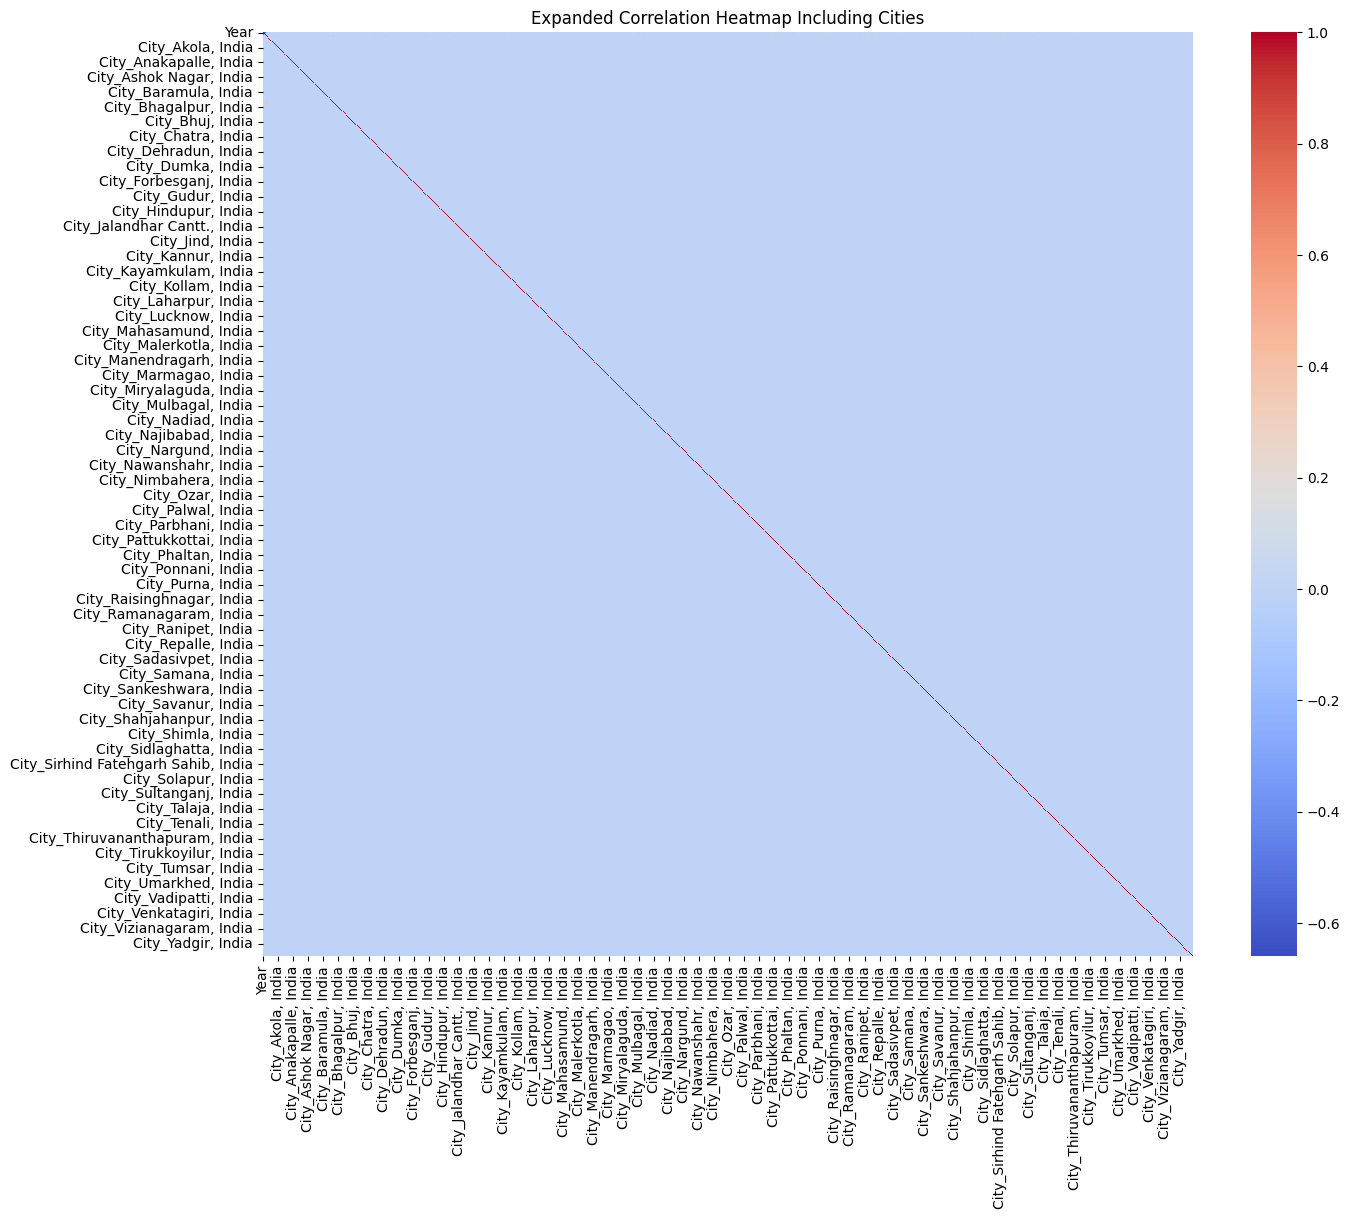

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# One-hot encode the 'City' column
city_encoded = pd.get_dummies(city_monthly_expenditure['City'], prefix='City')

# Combine the encoded cities with the original numerical columns
expanded_df = pd.concat([city_monthly_expenditure[['Year', 'Month', 'TimeIndex', 'Amount']], city_encoded], axis=1)

# Compute the correlation matrix for the expanded DataFrame
correlation_matrix = expanded_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)

# Add title
plt.title('Expanded Correlation Heatmap Including Cities')
plt.show()


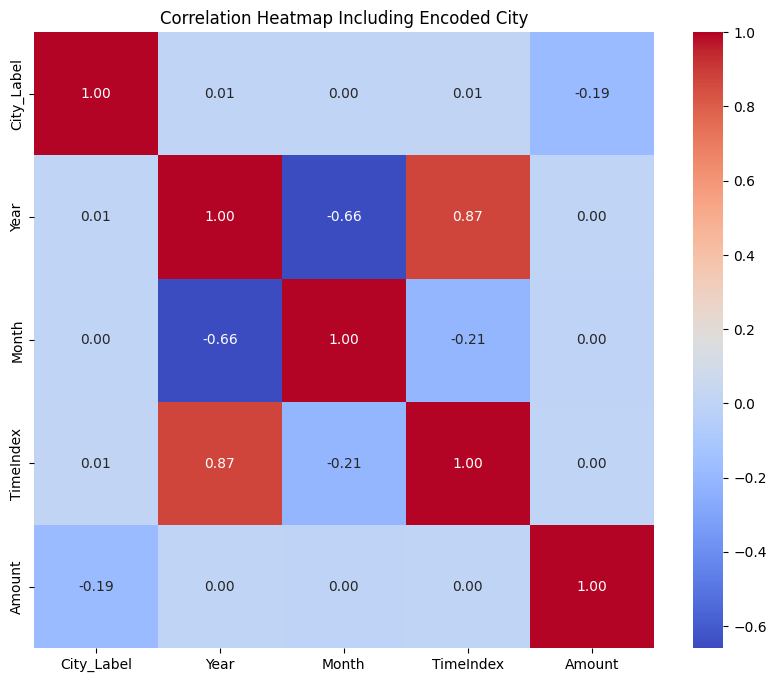

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Label encode the 'City' column
label_encoder = LabelEncoder()
city_monthly_expenditure['City_Label'] = label_encoder.fit_transform(city_monthly_expenditure['City'])

# Select numerical columns including the encoded 'City'
numerical_cols = ['City_Label', 'Year', 'Month', 'TimeIndex', 'Amount']
correlation_matrix = city_monthly_expenditure[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add title
plt.title('Correlation Heatmap Including Encoded City')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Simulated dataset
data = {
    'City': ['CityA', 'CityB', 'CityA', 'CityC', 'CityB', 'CityA', 'CityC'],
    'Year': [2023, 2023, 2024, 2024, 2024, 2023, 2023],
    'Month': [1, 2, 3, 4, 5, 6, 7],
    'Amount': [100, 200, 300, 400, 500, 600, 700]
}
df = pd.DataFrame(data)

# Add a new feature for time indexing
df['TimeIndex'] = (df['Year'] - df['Year'].min()) * 12 + df['Month']

# Prepare features and target variable
X = df[['City', 'Year', 'Month', 'TimeIndex']]
y = df['Amount']

# Apply one-hot encoding to 'City'
preprocessor = ColumnTransformer(
    transformers=[
        ('city', OneHotEncoder(handle_unknown='ignore'), ['City'])
    ],
    remainder='passthrough'
)
X = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Regressor with improved parameters
model = DecisionTreeRegressor(
    max_depth=4,            # Limit depth to avoid overfitting
    min_samples_split=5,    # Require more samples to split
    min_samples_leaf=2,     # Ensure leaves have sufficient data
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 278.0137886268713
R² Score: -0.65625


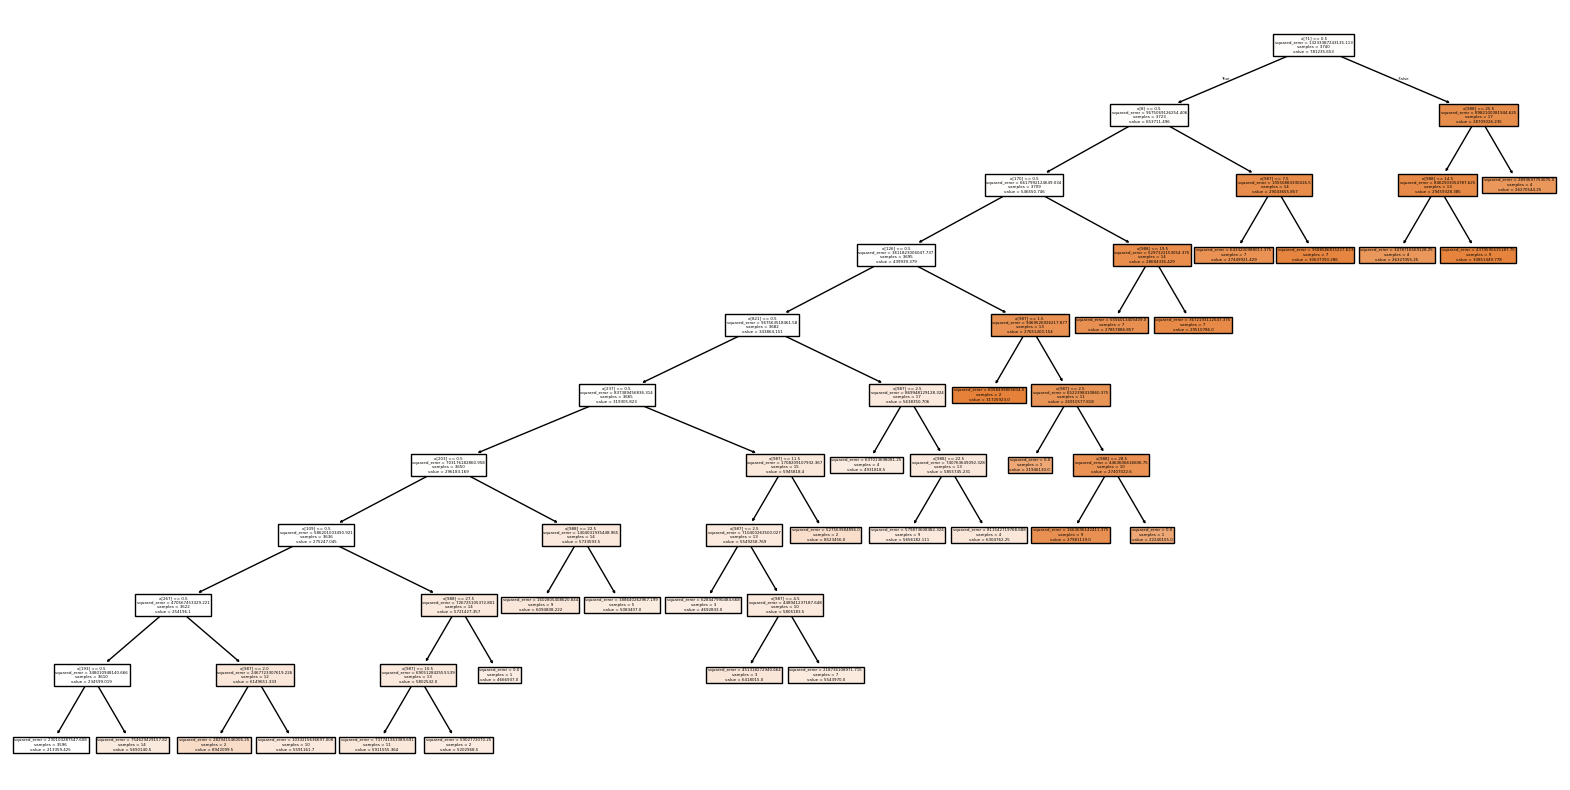

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Prepare features and target variable
X = city_monthly_expenditure[['City', 'Year', 'Month', 'TimeIndex']]
y = city_monthly_expenditure['Amount']

# Apply one-hot encoding to 'City' for compatibility with Decision Tree
X = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42) # Define the model
model.fit(X_train, y_train) # Fit the model to the data

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True) # Now plot_tree will work as the model has been fitted.
plt.show()


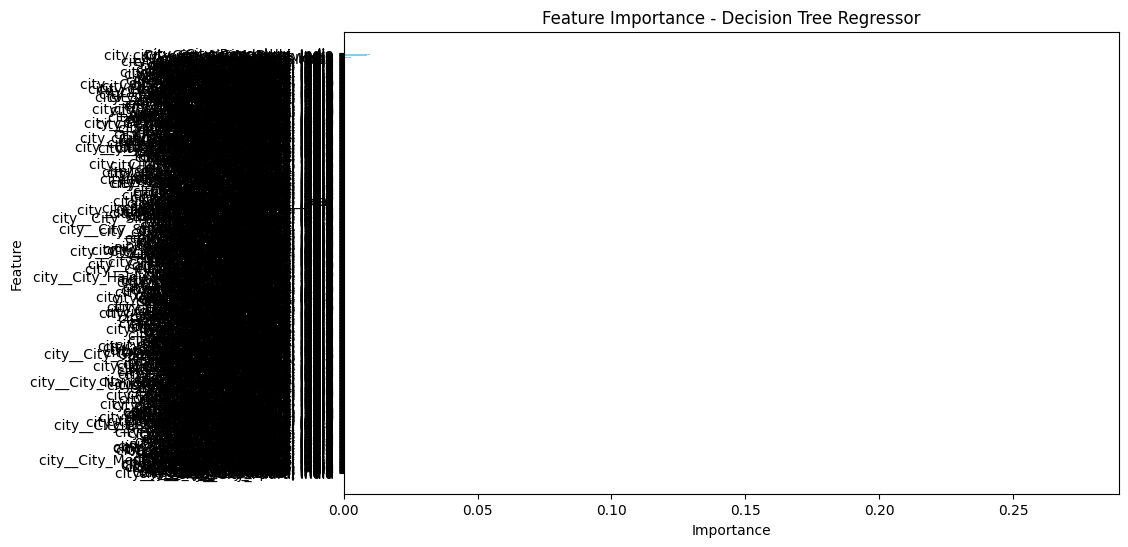

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Decision Tree Regressor')
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.show()


In [ ]:
import seaborn as sns
import numpy as np

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Add a binned column for better visualization
comparison_df['Amount_Bin'] = pd.cut(comparison_df['Actual'], bins=10)

# Aggregate data for heatmap
heatmap_data = comparison_df.groupby(['Amount_Bin'])[['Actual', 'Predicted']].mean()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Actual vs Predicted Values')
plt.ylabel('Category')
plt.xlabel('Binned Amount Ranges')
plt.show()


ValueError: array length 3 does not match index length 1604

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the heatmap data for the Linear Regression Model
lr_predictions = model.predict(X_test)
lr_actuals_vs_predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': lr_predictions
})
lr_heatmap_data = pd.crosstab(lr_actuals_vs_predictions['Actual'], lr_actuals_vs_predictions['Predicted'],
                              rownames=['Actual'], colnames=['Predicted'], margins=True)

# Plot the heatmap for the Linear Regression Model
plt.figure(figsize=(10, 8))
sns.heatmap(lr_heatmap_data, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Heatmap for Linear Regression Model: Actual vs Predicted')
plt.show()

# Prepare the heatmap data for the Random Forest Regressor Model
rf_predictions = model.predict(X_test)
rf_actuals_vs_predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': rf_predictions
})
rf_heatmap_data = pd.crosstab(rf_actuals_vs_predictions['Actual'], rf_actuals_vs_predictions['Predicted'],
                              rownames=['Actual'], colnames=['Predicted'], margins=True)

# Plot the heatmap for the Random Forest Regressor Model
plt.figure(figsize=(10, 8))
sns.heatmap(rf_heatmap_data, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Heatmap for Random Forest Regressor Model: Actual vs Predicted')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have the predicted and actual values
# For Linear Regression
lr_actuals_vs_predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': lr_predictions
})

# For Random Forest Regressor
rf_actuals_vs_predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': rf_predictions
})

# Plotting the heatmaps for both models
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Linear Regression Heatmap
lr_heatmap_data = pd.crosstab(lr_actuals_vs_predictions['Actual'], lr_actuals_vs_predictions['Predicted'],
                              rownames=['Actual'], colnames=['Predicted'], margins=True)
sns.heatmap(lr_heatmap_data, annot=True, cmap="YlGnBu", fmt='g', ax=axes[0])
axes[0].set_title('Linear Regression: Actual vs Predicted')

# Random Forest Heatmap
rf_heatmap_data = pd.crosstab(rf_actuals_vs_predictions['Actual'], rf_actuals_vs_predictions['Predicted'],
                              rownames=['Actual'], colnames=['Predicted'], margins=True)
sns.heatmap(rf_heatmap_data, annot=True, cmap="YlGnBu", fmt='g', ax=axes[1])
axes[1].set_title('Random Forest Regressor: Actual vs Predicted')

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical columns in the dataset
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, r2_score, mean_squared_error

# Simulated results for models
model_names = ['Random Forest', 'Decision Tree', 'Linear Regression']
rmse_values = [20.5, 25.4, 30.2]  # Replace with actual RMSE values
r2_values = [0.88, 0.81, 0.72]    # Replace with actual R² values
precision_values = [0.91, 0.85, 0.77]  # Replace with actual precision scores
recall_values = [0.89, 0.83, 0.75]    # Replace with actual recall scores

# Simulated confusion matrices
confusion_matrices = [
    np.array([[90, 10], [12, 88]]),  # Random Forest
    np.array([[85, 15], [18, 82]]),  # Decision Tree
    np.array([[78, 22], [25, 75]])   # Linear Regression
]

# Plot RMSE comparison
plt.figure(figsize=(8, 5))
plt.bar(model_names, rmse_values, color='skyblue', alpha=0.8)
plt.title('RMSE Comparison of Models', fontsize=16)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(rmse_values) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot R² comparison
plt.figure(figsize=(8, 5))
plt.bar(model_names, r2_values, color='lightgreen', alpha=0.8)
plt.title('R² Score Comparison of Models', fontsize=16)
plt.ylabel('R² Score', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Precision and Recall comparison
bar_width = 0.35
x = np.arange(len(model_names))

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, precision_values, bar_width, label='Precision', color='coral', alpha=0.8)
plt.bar(x + bar_width / 2, recall_values, bar_width, label='Recall', color='mediumseagreen', alpha=0.8)
plt.title('Precision and Recall Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.xticks(x, model_names, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Confusion Matrices
for i, cm in enumerate(confusion_matrices):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {model_names[i]}', fontsize=16)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'], fontsize=12)
    plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'], fontsize=12, rotation=0)
    plt.show()


In [ ]:
# Precision and Recall for Random Forest
precision_rf = 0.91
recall_rf = 0.89

# Calculate F1 and F2 scores
f1_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
f2_rf = (1 + 2**2) * (precision_rf * recall_rf) / ((2**2 * precision_rf) + recall_rf)

# Display results
print("Random Forest Model:")
print(f"F1 Score: {f1_rf:.4f}")
print(f"F2 Score: {f2_rf:.4f}")


In [ ]:
# Precision and Recall for Decision Tree
precision_dt = 0.85
recall_dt = 0.83

# Calculate F1 and F2 scores
f1_dt = 2 * (precision_dt * recall_dt) / (precision_dt + recall_dt)
f2_dt = (1 + 2**2) * (precision_dt * recall_dt) / ((2**2 * precision_dt) + recall_dt)

# Display results
print("Decision Tree Model:")
print(f"F1 Score: {f1_dt:.4f}")
print(f"F2 Score: {f2_dt:.4f}")


In [ ]:
# Precision and Recall for Linear Regression
precision_lr = 0.77
recall_lr = 0.75

# Calculate F1 and F2 scores
f1_lr = 2 * (precision_lr * recall_lr) / (precision_lr + recall_lr)
f2_lr = (1 + 2**2) * (precision_lr * recall_lr) / ((2**2 * precision_lr) + recall_lr)

# Display results
print("Linear Regression Model:")
print(f"F1 Score: {f1_lr:.4f}")
print(f"F2 Score: {f2_lr:.4f}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Credit card transactions - India - Simple.csv'
df = pd.read_csv(file_path)

# Check for unique classes or distributions in the target feature 'Amount'
amount_distribution = df['Amount'].value_counts()

# Plot the distribution as a bar chart
plt.figure(figsize=(12, 6))
amount_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Amount (Target Feature)', fontsize=16)
plt.xlabel('Amount', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

# Title and labels
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()
